In [1]:
%pip install ipykernel numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Дані
# Підготовчий етап

In [2]:
import numpy as np
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC

In [3]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def print_accuracy(y_test, y_pred, name="Model"):
    print("-"*60, f"{name}\n", sep='\n')
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

Перші 5 рядків:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


------------------------------------------------------------
Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

------------------------------------------------------------
Описова статистика:


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


------------------------------------------------------------
Пропуски в даних:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


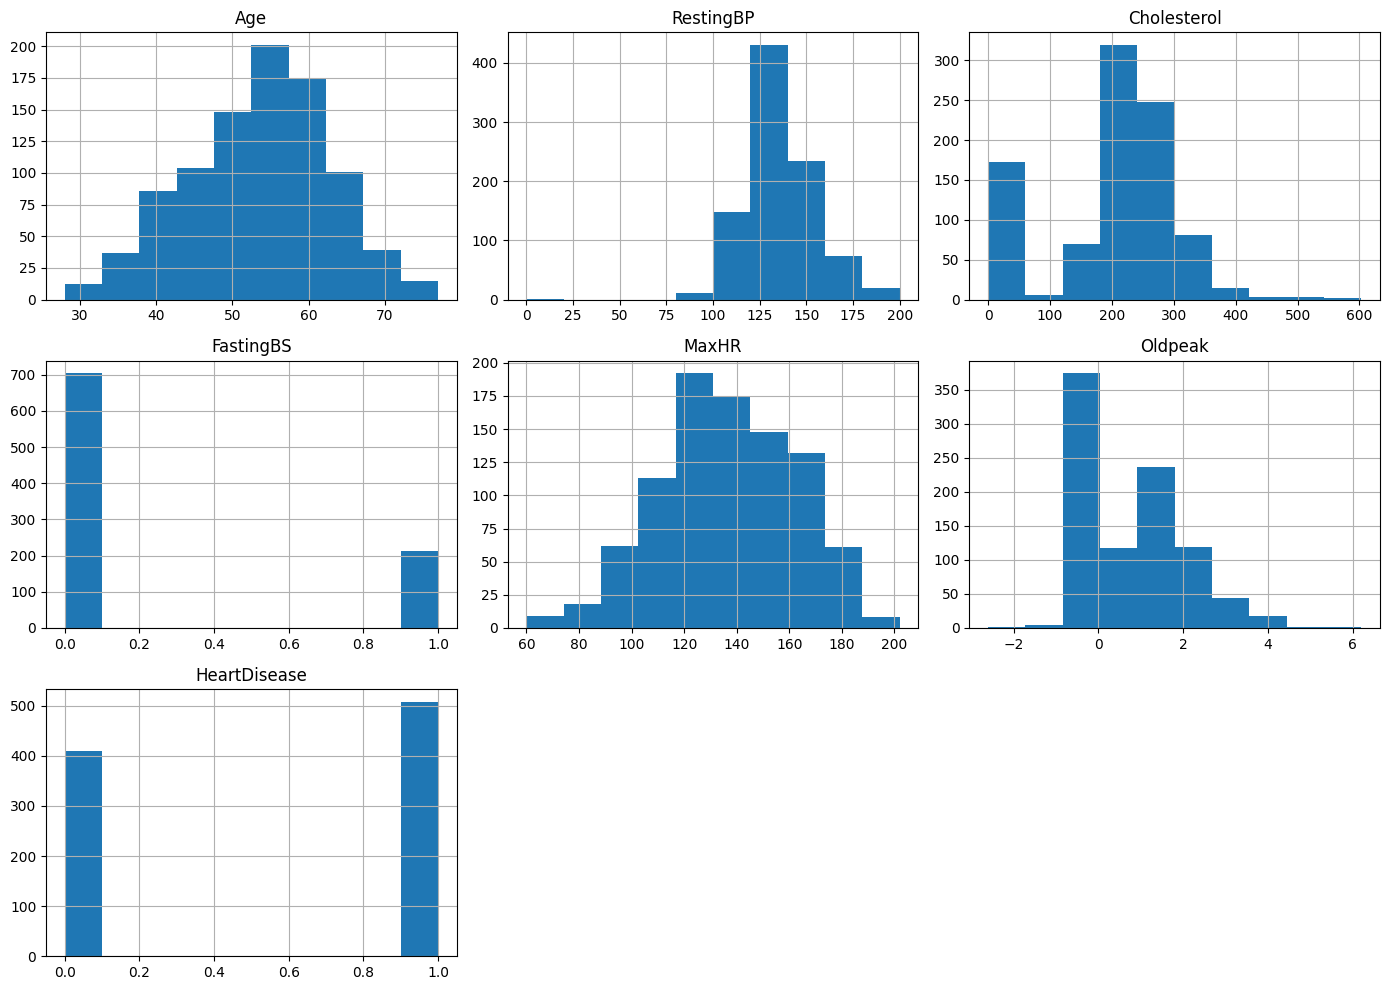

In [4]:
filename = '../Lab2/data/heart.csv'
data = pd.read_csv(filename)

print("Перші 5 рядків:")
display(data.head())

print("-"*60, "Інформація про дані:", sep='\n')
display(data.info())

print("-"*60, "Описова статистика:", sep='\n')
display(data.describe().T)

print("-"*60, "Пропуски в даних:", sep='\n')
print(data.isnull().sum())

data.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

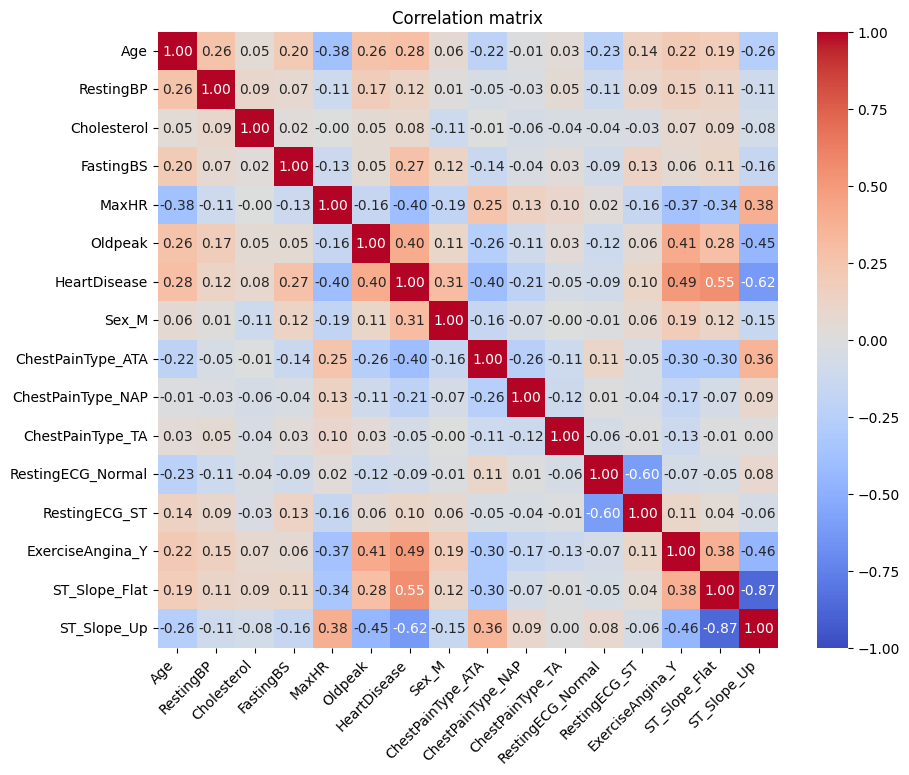

In [5]:
chol_median = data.loc[data["Cholesterol"] > 0, "Cholesterol"].median()
data.loc[data["Cholesterol"] == 0, "Cholesterol"] = chol_median

rest_median = data.loc[data["RestingBP"] > 0, "RestingBP"].median()
data.loc[data["RestingBP"] == 0, "RestingBP"] = rest_median

data_ = pd.get_dummies(data, drop_first=True)  # one-hot encoding

corr = data_.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation matrix')
plt.show()

In [6]:
X = data_.drop('HeartDisease', axis=1).to_numpy(dtype=float)
y = data_.HeartDisease.to_numpy(dtype=int)[:, None]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Реалізація класифікатору

Реалізувати навчання метода опорних векторів (Support Vector Machine)

In [7]:
def rbf_kernel(X1, X2, gamma=0.1):
    # Радіальна базисна функція (RBF)
    # K(x, y) = exp(-gamma * ||x-y||^2)
    if X1.ndim == 1:
        X1 = X1.reshape(1, -1)
    if X2.ndim == 1:
        X2 = X2.reshape(1, -1)
    dist_matrix = np.sum((X1[:, None, :] - X2[None, :, :])**2, axis=2)
    return np.exp(-gamma * dist_matrix)

class RBF_SVM:
    def __init__(self, C=1.0, gamma=0.1, learning_rate=0.001, iterations=1000):
        self.C = C
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = None
        self.b = 0
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        n_samples = X.shape[0]
        y_ = np.where(y <= 0, -1, 1).flatten()
        self.alpha = np.zeros(n_samples)
        self.X_train = X
        self.y_train = y_

        K = rbf_kernel(X, X, self.gamma)

        for _ in range(self.iterations):
            for i in range(n_samples):
                u = np.sum(self.alpha * y_ * K[:, i])
                if y_[i] * (u + self.b) < 1:
                    self.alpha[i] += self.learning_rate * (1 - y_[i] * (u + self.b))
                    self.b += self.learning_rate * y_[i]

    def project(self, X):
        K = rbf_kernel(X, self.X_train, self.gamma)
        return np.dot(K, self.alpha * self.y_train) + self.b

    def predict(self, X):
        return np.where(self.project(X) >= 0, 1, 0)


------------------------------------------------------------
[Self SVM]

Accuracy: 0.8370

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       123
           1       0.81      0.92      0.86       153

    accuracy                           0.84       276
   macro avg       0.85      0.83      0.83       276
weighted avg       0.84      0.84      0.83       276



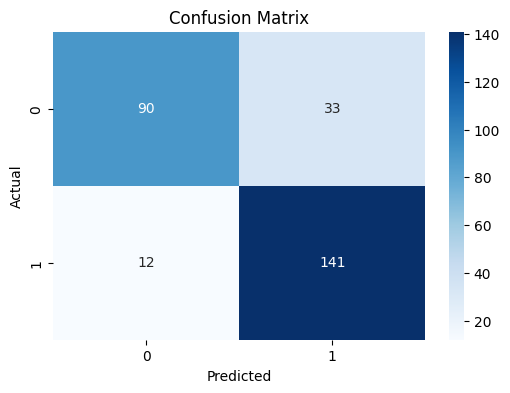

In [8]:
svm_model = RBF_SVM(C=1.0, gamma=0.1, learning_rate=0.001, iterations=1000)
svm_model.fit(X_train_scaled, y_train.ravel())

y_pred = svm_model.predict(X_test_scaled)
print_accuracy(y_test, y_pred, name="[Self SVM]")

------------------------------------------------------------
[Sklearn SVM]

Accuracy: 0.8804

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       123
           1       0.88      0.92      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



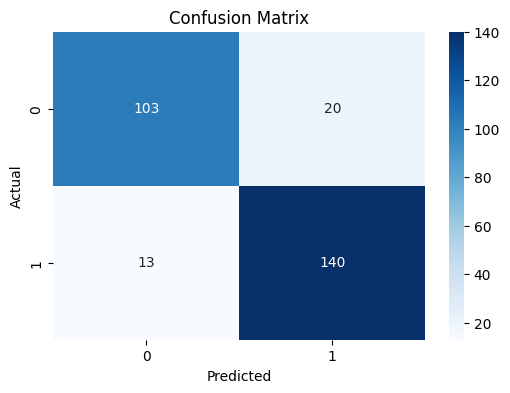

In [9]:
svm_model_skl = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model_skl.fit(X_train_scaled, y_train.ravel())

y_pred_svm = svm_model_skl.predict(X_test_scaled)
print_accuracy(y_test, y_pred_svm, name="[Sklearn SVM]")

# Аналіз результатів

1. Вибір параметрів ядра та їх обґрунтування
2. Оцінка помилок на начальній та тестовій вибірках

- RBF ядро дозволяє моделі захоплювати нелінійні взаємозв’язки.
- C контролює, наскільки суворо модель намагається класифікувати всі точки без помилок. 1.0 - баланс між точністю на тренуванні та узагальненням
- Gamma визначає "ширину" впливу опорних векторів. 'scale' — автоматичне масштабування по дисперсії ознак

------------------------------------------------------------
[Self SVM Train Accuracy]

Accuracy: 0.9065

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       287
           1       0.89      0.95      0.92       355

    accuracy                           0.91       642
   macro avg       0.91      0.90      0.90       642
weighted avg       0.91      0.91      0.91       642



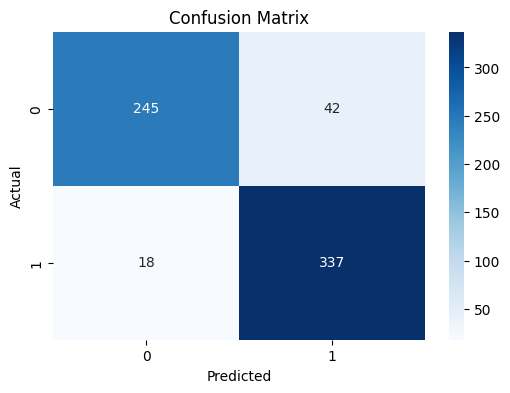

------------------------------------------------------------
[Self SVM Test Accuracy]

Accuracy: 0.8370

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       123
           1       0.81      0.92      0.86       153

    accuracy                           0.84       276
   macro avg       0.85      0.83      0.83       276
weighted avg       0.84      0.84      0.83       276



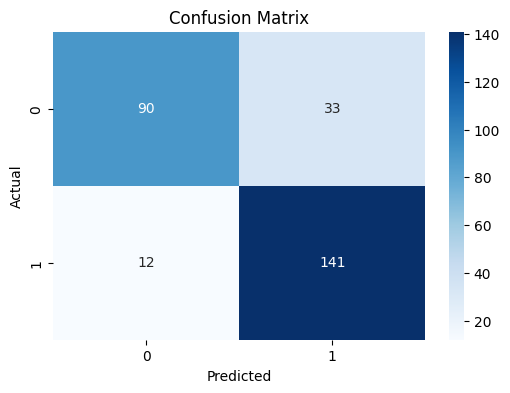

In [10]:
y_train_pred = svm_model.predict(X_train_scaled)
print_accuracy(y_train, y_train_pred, name="[Self SVM Train Accuracy]")
print_accuracy(y_test, y_pred, name="[Self SVM Test Accuracy]")

------------------------------------------------------------
[Sklearn SVM Train Accuracy]

Accuracy: 0.8910

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       287
           1       0.88      0.93      0.90       355

    accuracy                           0.89       642
   macro avg       0.89      0.89      0.89       642
weighted avg       0.89      0.89      0.89       642



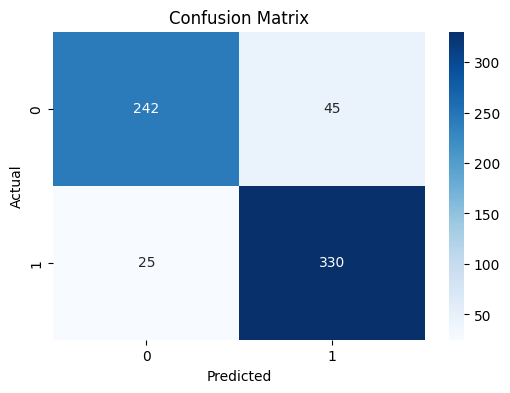

------------------------------------------------------------
[Sklearn SVM Test Accuracy]

Accuracy: 0.8804

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       123
           1       0.88      0.92      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



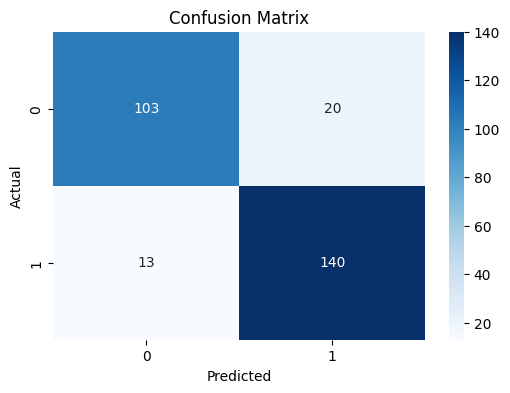

In [11]:
y_train_pred = svm_model_skl.predict(X_train_scaled)
print_accuracy(y_train, y_train_pred, name="[Sklearn SVM Train Accuracy]")
print_accuracy(y_test, y_pred_svm, name="[Sklearn SVM Test Accuracy]")

# Контрольні питання

1. Способи вирішення нелінійної задачі XOR із використанням ядерного SVM
- Використання **ядрових функцій (kernels)**:
  - RBF (`kernel='rbf'`)
  - Поліноміальне (`kernel='poly'`)
- Мета: трансформувати дані у простір вищої розмірності, де XOR стане лінійно роздільним.

2. Поняття опорного вектору
- **Опорні вектори** — це точки навчальної вибірки, які знаходяться на межі або дуже близько до кордону класу.
- Вони визначають положення **гіперплощини** та **margin**.
- Решта точок майже не впливають на модель.

3. Особливості вибору параметрів ядра

| Ядро | Особливості |
|------|-------------|
| Лінійне | Для лінійно роздільних даних, швидко, мало параметрів |
| RBF | Для нелінійних даних, підбираємо `gamma` і `C` |
| Поліноміальне | Для складних кривих залежностей, підбираємо ступінь `degree` |

4. Атрибути sklearn.svm.SVс

| Атрибут | Опис |
|---------|------|
| `class_weight_` | Множники параметра `C` для кожного класу. Обчислюється на основі параметра `class_weight`. |
| `classes_` | Мітки класів у навчальних даних. |
| `coef_` | Ваги для ознак при `kernel="linear"`. Форма: `(n_classes * (n_classes - 1) / 2, n_features)` |
| `dual_coef_` | Двійкові коефіцієнти опорних векторів у функції рішення. Для багатокласової задачі містить коефіцієнти всіх 1-vs-1 класифікаторів. |
| `fit_status_` | 0 — модель успішно навченa, 1 — попередження про проблеми при навчанні. |
| `intercept_` | Константи в функції рішення. Форма: `(n_classes * (n_classes - 1) / 2,)` |
| `n_features_in_` | Кількість ознак, які були використані під час навчання. |
| `feature_names_in_` | Імена ознак, якщо X мав назви рядків. Додається у версії 1.0. |
| `n_iter_` | Кількість ітерацій оптимізаційного алгоритму для навчання моделі. |
| `support_` | Індекси опорних векторів. |
| `support_vectors_` | Значення опорних векторів. Порожній масив, якщо ядро попередньо обчислене. |
| `n_support_` | Кількість опорних векторів для кожного класу. |
| `probA_` | Параметр, навчені методом Platt scaling при `probability=True`. |
| `probB_` | Параметр, навчені методом Platt scaling при `probability=True`. |
| `shape_fit_` | Розміри масиву тренувальних даних X. |